### Clasificación de imagenes de deportes

Se presenta un dataset de imagenes de distintos deportes (baeisbol, basketbol, box, soccer y americano) para clasificación.

Presenta Carlos Alberto Rábago Figueroa

#### El contenido es el siguiente:
-Importar Librerías
-Cargar dataset de imágenes
-Generamos etiquetas y clases
-Creamos Sets de Entrenamiento y Prueba
-Preprocesamos las imagenes
-Aplicamos el One-hot Encoding
-Creamos el Set de Entrenamiento y Validación
-Creamos el modelo
-Entrenamos el modelo
-Evaluamos la red
-Reporte de clasificación

### Importar Librerías

In [52]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [53]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

### Cargar dataset de imágenes

In [54]:
dirname = os.path.join(os.getcwd(), 'imagenes')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("Procesando imagenes de:\n",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print("------------------------------------------------------------------------------")
print('Directorios Procesados:',len(directories))
print("Imagenes por cada directorio", dircount)
print('Total de imagenes por subdiretorio:',sum(dircount))

Procesando imagenes de:
 C:\Users\Rabago\Desktop\RN\imagenes\
C:\Users\Rabago\Desktop\RN\imagenes\basketball 1
C:\Users\Rabago\Desktop\RN\imagenes\beisbol 8823
C:\Users\Rabago\Desktop\RN\imagenes\boxeo 7752
C:\Users\Rabago\Desktop\RN\imagenes\f_americano 7125
C:\Users\Rabago\Desktop\RN\imagenes\Soccer 9348
------------------------------------------------------------------------------
Directorios Procesados: 5
Imagenes por cada directorio [8824, 7752, 7125, 9348, 7616]
Total de imagenes por subdiretorio: 40665


### Generamos etiquetas y clases

In [55]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print(" Etiquetas generadas: ",len(labels))

 Etiquetas generadas:  40665


In [56]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 basketball
1 beisbol
2 boxeo
3 f_americano
4 Soccer


In [57]:
y = np.array(labels)
#Transformado de lista a numpy arrays
X = np.array(images, dtype=np.uint8) 

# Asignando numeros unicos a las etiquetas de entrenamiento 
classes = np.unique(y)
nClasses = len(classes)
print('Número total de salidas: ', nClasses)
print('Clases de salida: ', classes)

Número total de salidas:  5
Clases de salida:  [0 1 2 3 4]


### Creamos Sets de Entrenamiento y Prueba

In [58]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Formando datos de entrenamiento: ', train_X.shape, train_Y.shape)
print('Formando datos de prueba: ', test_X.shape, test_Y.shape)

Formando datos de entrenamiento:  (32532, 21, 28, 3) (32532,)
Formando datos de prueba:  (8133, 21, 28, 3) (8133,)


Text(0.5, 1.0, 'Ground Truth : 2')

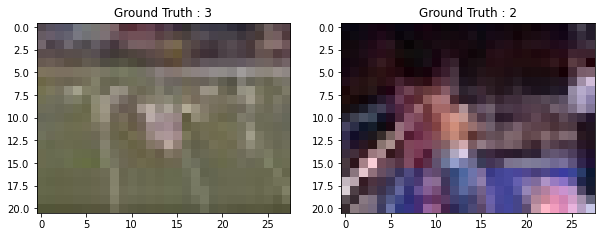

In [59]:
plt.figure(figsize=[10,10])

# Mostrar la primera imagen en los datos de entrenamiento
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Mostrar la primera imagen en los datos de prueba
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

### Preprocesamos las imagenes

In [60]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

### Aplicamos el One-hot Encoding para la red

One Hot Encoding. La estrategia que implementa es crear una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0. 

In [61]:
# Cambiar las etiquetas de forma categorica por medio de one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Mostrando el cambio generado por el one-hot encoding
print('Etiqueta Original:', train_Y[0])
print('Conversion de Etiqueta con one-hot:', train_Y_one_hot[0])

Etiqueta Original: 3
Conversion de Etiqueta con one-hot: [0. 0. 0. 1. 0.]


### Creamos el Set de Entrenamiento y Validación

Se divide el dataset en 75 y 25 pa entrenamiento y prueba

In [62]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.25, random_state=13)

In [63]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(24399, 21, 28, 3) (8133, 21, 28, 3) (24399, 5) (8133, 5)


### Creamos el modelo

In [64]:
# Declaramos variables con los parámetros de configuración de la red

INIT_LR = 1e-3     # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 10        # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64    # cantidad de imágenes que se toman a la vez en memoria

In [65]:
deporte_model = Sequential()
#Se crea la primer capa Convulucional de 2 Dimensiones, donde se encuntran las imagenes 21x28x3, el 3 es por los colores RGB(rojo, Verde y azul)
# Se aplicaron 32 filtros de dimensiones 3x3 
deporte_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3))) 
deporte_model.add(LeakyReLU(alpha=0.1))
# se hara un Maxpooling 2x2 el cual reduce la imagen de entrada a la mita 11x14.
deporte_model.add(MaxPooling2D((2, 2),padding='same'))
# se utiliza Dropout para evitar el sobreajuste
deporte_model.add(Dropout(0.5))

#se utiliza Flatten (aplanamiento) de los 32 filtros para crear una capa de 32 neuronas sencillas
deporte_model.add(Flatten())
deporte_model.add(Dense(32, activation='linear'))
deporte_model.add(LeakyReLU(alpha=0.1))
deporte_model.add(Dropout(0.5))
# se activa con Softmax la capa de salida 
deporte_model.add(Dense(nClasses, activation='softmax'))

In [66]:
deporte_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 21, 28, 32)        896       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 21, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 11, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4928)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                157728    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32)               

Se compila la red deporte_model.compile() y le se le asigna el optimizador Adagrad (algoritmo del gradiente adaptativo)se utilizan diferentes tasas de aprendizaje para las variables teniendo en cuenta gradiente acumulado en cada una de ellas.

In [67]:
deporte_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['acc'])

### Entrenamos el modelo

In [72]:
sport_train = deporte_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/10
382/382 [==============================] - 31s 80ms/step - loss: 0.5699 - acc: 0.8181 - val_loss: 0.4174 - val_acc: 0.8877
Epoch 2/10
382/382 [==============================] - 31s 82ms/step - loss: 0.5626 - acc: 0.8225 - val_loss: 0.4107 - val_acc: 0.8913
Epoch 3/10
382/382 [==============================] - 31s 81ms/step - loss: 0.5577 - acc: 0.8227 - val_loss: 0.4030 - val_acc: 0.8914
Epoch 4/10
382/382 [==============================] - 30s 78ms/step - loss: 0.5509 - acc: 0.8237 - val_loss: 0.3962 - val_acc: 0.8923
Epoch 5/10
382/382 [==============================] - 27s 71ms/step - loss: 0.5441 - acc: 0.8289 - val_loss: 0.3920 - val_acc: 0.8943
Epoch 6/10
382/382 [==============================] - 27s 71ms/step - loss: 0.5338 - acc: 0.8346 - val_loss: 0.3860 - val_acc: 0.8963
Epoch 7/10
382/382 [==============================] - 28s 74ms/step - loss: 0.5257 - acc: 0.8344 - val_loss: 0.3805 - val_acc: 0.8982
Epoch 8/10
382/382 [==============================] - 26s 68ms

#### Se observa que tras 10 iteraciones completas al set de entrenamiento, se logra un accuracy del 83 %, y en el set de validacion un 90%

In [42]:
# guardamos los resultados
deporte_model.save("Deportes_mnist.h5py")

INFO:tensorflow:Assets written to: Deportes_mnist.h5py\assets


### Evaluamos la red

In [79]:
test_eval = deporte_model.evaluate(test_X, test_Y_one_hot, verbose=1)

255/255 [==============================] - 4s 14ms/step - loss: 0.3826 - acc: 0.8972


In [80]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.3826007843017578
Test accuracy: 0.8972089290618896


#### En el conjunto de test vemos que alcanza un accuracy del 89 % reconociendo las imagenes.

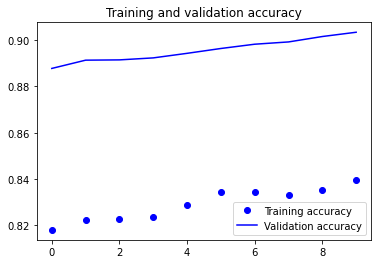

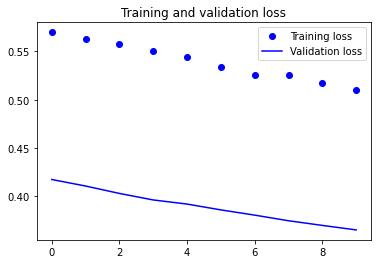

In [81]:
accuracy = sport_train.history['acc']
val_accuracy = sport_train.history['val_acc']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [82]:
predicted_classes2 = deporte_model.predict(test_X)

In [83]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [84]:
predicted_classes.shape, test_Y.shape

((8133,), (8133,))

### Reporte de clasificación

In [85]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.93      0.90      0.91      1789
     Class 1       0.92      0.84      0.88      1575
     Class 2       0.95      0.97      0.96      1400
     Class 3       0.79      0.89      0.83      1877
     Class 4       0.95      0.90      0.92      1492

    accuracy                           0.90      8133
   macro avg       0.91      0.90      0.90      8133
weighted avg       0.90      0.90      0.90      8133



La clase que peor detecta es la clase 3 futbol americano con un accuracy de 79 %